In [2]:
# from keras.applications import VGG16
# conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# conv_base.summary()
# accuracy = 78%

# from keras.applications import Xception
# conv_base = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

from keras.applications import VGG19
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# from keras.applications import ResNet50
# conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(197, 197, 3))

In [6]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l1_l2(0.3)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l1_l2(0.3)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_regularizer = regularizers.l1_l2(0.3)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
__________

In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils.np_utils import to_categorical
from numpy import array, argmax

# categories = array(['0', '1', '2', '3', '4'])
# encoded = to_categorical(categories)
# inverted = argmax(encoded)
# label = np_utils.to_categorical(4)
# print(encoded)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    'diabetic/processed_images/train',
    target_size=(224, 224),
    classes=['0', '1', '2', '3', '4'],
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    'diabetic/processed_images/validation',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

model.compile(loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit_generator(
    train_generator,
    class_weight={0: 1, 1: 10.6, 2: 4.6, 3: 30, 4: 37},
    steps_per_epoch = 500,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 300)

Found 30000 images belonging to 5 classes.
Found 5120 images belonging to 5 classes.
Epoch 1/50
500/500 [==============================] - 508s - loss: 3979.3220 - acc: 0.4039 - val_loss: 1612.6602 - val_acc: 0.7500
Epoch 2/50
500/500 [==============================] - 507s - loss: 1435.3194 - acc: 0.2068 - val_loss: 1235.9864 - val_acc: 0.1378
Epoch 3/50
500/500 [==============================] - 505s - loss: 1085.5988 - acc: 0.2736 - val_loss: 912.6709 - val_acc: 0.1453
Epoch 4/50
500/500 [==============================] - 505s - loss: 788.7162 - acc: 0.4097 - val_loss: 641.9279 - val_acc: 0.7487
Epoch 5/50
500/500 [==============================] - 505s - loss: 543.7569 - acc: 0.5445 - val_loss: 423.3931 - val_acc: 0.7460
Epoch 6/50
500/500 [==============================] - 505s - loss: 351.1977 - acc: 0.6851 - val_loss: 256.9820 - val_acc: 0.7470
Epoch 7/50
500/500 [==============================] - 505s - loss: 211.0485 - acc: 0.6858 - val_loss: 143.0584 - val_acc: 0.7468
Epoch 8

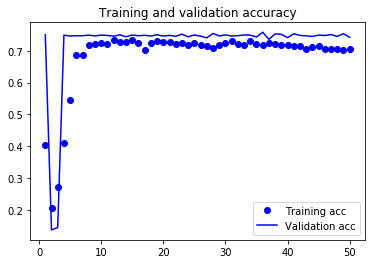

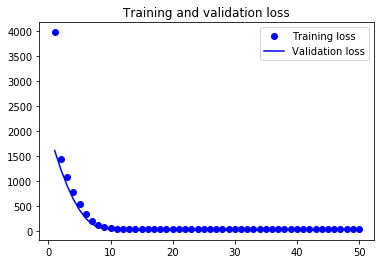

In [11]:
import h5py
import matplotlib.pyplot as plt

model.save("vgg19.model")
model.save('saved_models/vgg19-model.h5')
model.save_weights('saved_models/vgg19.h5', overwrite=True)
json_string = model.to_json()

with open('saved_models/vgg19.json', 'w') as f:
      f.write(json_string)


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
# backup
# preds = pd.read_csv(os.path.join('submission_backup.csv'))

# def get_labels(directory):
#     return os.listdir(directory)

# idx_label =  get_labels(os.path.abspath(os.path.join('diabetic/processed_images/test')))

# len(idx_label)
# print(idx_label[0])
# print(os.path.splitext(idx_label)[0])

In [ ]:
# from __future__ import absolute_import
# import pandas as pd
# import matplotlib.pyplot as plt
# import os
# %matplotlib inline




# l = os.listdir('diabetic/processed_images/test')
# idx_label = [x.split('.')[0] for x in l]

# len(idx_label)
# idx_label

In [ ]:
# pd.DataFrame(idx_label)

In [ ]:
# preds['image'] = idx_label
# print(preds)

In [9]:
# load_model_sample.py
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import os
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

# def load_image(img_path, show=True):

#     img = image.load_img(img_path, target_size=(150, 150))
#     img_tensor = image.img_to_array(img)                    # (height, width, channels)
#     img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
#     img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

#     if show:
#         plt.imshow(img_tensor[0])                           
#         plt.axis('off')
#         plt.show()

#     return img_tensor


if __name__ == "__main__":
#     sample_datagen = ImageDataGenerator(rescale=1./255)
#     sample_generator = sample_datagen.flow_from_directory(
#         'sample',
#         target_size=(150, 150),
#         classes=['0', '1', '2', '3', '4'],
#         batch_size=1,
#         shuffle=False,
#         class_mode='categorical')
    model.load_weights('saved_models/vgg19.h5')    
#     model = load_model('vgg19.model')
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    model.compile(loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
# Single Image
#     img_path = image.load_img('sample/test2/38016_right.jpeg', target_size=(224, 224))
#     x = image.img_to_array(img_path)
#     x = np.expand_dims(x, axis=0)

#     filenames = sample_generator.filenames
#     nb_samples = len(filenames)
#     print(nb_samples)
#     prediction = model.predict_generator(sample_generator, steps = 17)
#     print prediction

    test_datagen = ImageDataGenerator(rescale=1./255)

    test_generator = test_datagen.flow_from_directory(
            'diabetic/processed_images/test_subset',
            target_size=(224, 224),
#             classes=['0', '1', '2', '3', '4'],
            shuffle = "false",
            class_mode=None,
            batch_size=1)

    filenames = test_generator.filenames
    nb_samples = len(filenames)
    
    predicted_classes = np.argmax(test_generator)
    true_classes = test_generator.classes
    predict = model.predict_generator(test_generator, steps = 700, verbose=1)
#     predict = model.predict_on_batch(np.array(test_generator))
#     print(predicted_classes)
#     print(true_classes)
#     print(predict)
#     y_predictions = probas_to_classes(predict)
    print(predict.argmax(axis=-1))
#     out2 = model.predict(x, verbose=1)
#     out3 = model.predict_classes(x)

#     print(np.argmax(out2))
#     print(np.argmax(out3))


Found 1000 images belonging to 1 classes.
700/700 [==============================] - 49s    
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 